In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import scipy.stats as stats
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer

In [190]:
#Load data (Note data has been moved to Jupyter, and named based on last 3 digits of Prof ID)
df = pd.read_csv('semi_cleaned.csv', index_col=[0]) # qn. what cleaning did you do before?  - RV

In [191]:
df.reset_index()

index       rt                                           response  \
0         0  20532.0  {"prolific_ID_name_start":"5ea0228d4f38cb0326e...   
1         1      NaN                                                NaN   
2         2      NaN                                                NaN   
3         3  18836.0                                                 {}   
4         4   3586.0                                                 {}   
...     ...      ...                                                ...   
1734   1734   5158.0                {"gender":"Female","hispanic":"No"}   
1735   1735   3997.0                                 {"race":["White"]}   
1736   1736  17139.0                         {"age":"23","location":""}   
1737   1737   6055.0  {"prolific_ID_name_end":"61fa94b05719bc09cb834...   
1738   1738      NaN                                                NaN   

                   trial_type  trial_index  time_elapsed internal_node_id  \
0            survey-html-form            0         20545          0.0-0.0   
1                     preload            1         21757          0.0-1.0   
2                  fullscreen            2         22764          0.0-2.0   
3            survey-html-form            3         41603          0.0-3.0   
4            survey-html-form            4         45191          0.0-4.0   
...                       ...          ...           ...              ...   
1734      survey-multi-choice           31        450360         0.0-31.0   
1735      survey-multi-select           32        454367         0.0-32.0   
1736         survey-html-form           33        471511         0.0-33.0   
1737         survey-html-form           34        477568         0.0-34.0   
1738  video-keyboard-response           35        486584         0.0-35.0   

      participant                                          stim_list  \
0               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
1               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
2               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
3               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
4               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
...           ...                                                ...   
1734            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1735            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1736            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1737            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1738            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   

        time_saved  ...  timeout failed_images failed_audio failed_video  \
0     1.679070e+12  ...      NaN           NaN          NaN          NaN   
1     1.679070e+12  ...    False            []           []           []   
2     1.679070e+12  ...      NaN           NaN          NaN          NaN   
3     1.679070e+12  ...      NaN           NaN          NaN          NaN   
4     1.679070e+12  ...      NaN           NaN          NaN          NaN   
...            ...  ...      ...           ...          ...          ...   
1734  1.679070e+12  ...      NaN           NaN          NaN          NaN   
1735  1.679070e+12  ...      NaN           NaN          NaN          NaN   
1736  1.679070e+12  ...      NaN           NaN          NaN          NaN   
1737  1.679070e+12  ...      NaN           NaN          NaN          NaN   
1738  1.679070e+12  ...      NaN           NaN          NaN          NaN   

     stimulus demo_trial_ind demo_vid_name  trial_ind vid_name  question_order  
0         NaN            NaN           NaN        NaN      NaN             NaN  
1         NaN            NaN           NaN        NaN      NaN             NaN  
2         NaN            NaN           NaN        NaN      NaN             NaN  
3         NaN            NaN           NaN        NaN      NaN             NaN

In [192]:
#See shape to assess size of df
df.shape

(1739, 21)

In [193]:
#Inspect column names and data type to ensure everything imported correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 1738
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rt                1155 non-null   float64
 1   response          1155 non-null   object 
 2   trial_type        1739 non-null   object 
 3   trial_index       1739 non-null   int64  
 4   time_elapsed      1739 non-null   int64  
 5   internal_node_id  1739 non-null   object 
 6   participant       1739 non-null   int64  
 7   stim_list         1739 non-null   object 
 8   time_saved        1739 non-null   float64
 9   time_done         1655 non-null   float64
 10  success           98 non-null     object 
 11  timeout           49 non-null     object 
 12  failed_images     49 non-null     object 
 13  failed_audio      49 non-null     object 
 14  failed_video      49 non-null     object 
 15  stimulus          485 non-null    object 
 16  demo_trial_ind    98 non-null     float64


In [194]:
#Adjust display to see all responses
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 35)

In [195]:
#Inspect response columns to see lines of interest
df['response']

0       {"prolific_ID_name_start":"5ea0228d4f38cb0326e...
1                                                     NaN
2                                                     NaN
3                                                      {}
4                                                      {}
                              ...                        
1734                  {"gender":"Female","hispanic":"No"}
1735                                   {"race":["White"]}
1736                           {"age":"23","location":""}
1737    {"prolific_ID_name_end":"61fa94b05719bc09cb834...
1738                                                  NaN
Name: response, Length: 1739, dtype: object

In [196]:
#Inspect responses using value counts
df['response'].value_counts() 
# this is nice, but not sure what exactly this is telling you - is this data from all subs? based on your value counts for gender

{}                                                                          340
{"Text1":"test1"}                                                            45
{"race":["White"]}                                                           35
{"gender":"Male","hispanic":"No"}                                            22
{"gender":"Female","hispanic":"No"}                                          19
                                                                           ... 
{"Q0":"two dots following each other, almost like flies in a room "}          1
{"Q0":"Twk very curious dots"}                                                1
{"Q0":"two dots floating around and connected when they saw eqachother"}      1
{"Text1":"I would say flies"}                                                 1
{"prolific_ID_name_end":"61fa94b05719bc09cb834fe9"}                           1
Name: response, Length: 662, dtype: int64

In [197]:
#Isolate text responses (exlcuding demographic Qs)

#Use string filtering to find rows with a response to a video
filt1 = df['response'].str.contains('Q0', na=False)

df[filt1]

rt                                           response   trial_type  \
9     22546.0  {"Q0":"2 balls moving around inside a square a...  survey-text   
11    26687.0  {"Q0":"2 balls moving in a box randomly and oc...  survey-text   
15    27296.0  {"Q0":"2 balls moving around with the black on...  survey-text   
17    19685.0  {"Q0":"2 balls moving randomly around and insi...  survey-text   
19    24614.0  {"Q0":"again 2 balls moving around inside the ...  survey-text   
...       ...                                                ...          ...   
1722  20289.0  {"Q0":"dark grey was on the right side and lig...  survey-text   
1724  26223.0  {"Q0":"They were going a bit crazy here, circl...  survey-text   
1726  35021.0  {"Q0":"it looked like they were almost trying ...  survey-text   
1728  23761.0  {"Q0":"light grey kept following around dark g...  survey-text   
1730  21431.0  {"Q0":"they both equally looked like they were...  survey-text   

      trial_index  time_elapsed internal_node_id  participant  \
9               9        109540          0.0-9.0            1   
11             11        144298         0.0-11.0            1   
15             15        185779         0.0-15.0            1   
17             17        213512         0.0-17.0            1   
19             19        246208         0.0-19.0            1   
...           ...           ...              ...          ...   
1722           19        242493         0.0-19.0            1   
1724           21        276760         0.0-21.0            1   
1726           23        319792         0.0-23.0            1   
1728           25        351598         0.0-25.0            1   
1730           27        381085         0.0-27.0            1   

                                              stim_list    time_saved  \
9     [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...  1.679070e+12   
11    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...  1.679070e+12   
15    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...  1.679070e+12   
17    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...  1.679070e+12   
19    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...  1.679070e+12   
...                                                 ...           ...   
1722  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...  1.679070e+12   
1724  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...  1.679070e+12   
1726  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...  1.679070e+12   
1728  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...  1.679070e+12   
1730  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...  1.679070e+12   

         time_done  ... timeout failed_images failed_audio failed_video  \
9     1.679070e+12  ...     NaN           NaN          NaN          NaN   
11    1.679070e+12  ...     NaN           NaN          NaN          NaN   
15    1.679070e+12  ...     NaN           NaN          NaN          NaN   
17    1.679070e+12  ...     NaN           NaN          NaN          NaN   
19    1.679070e+12  ...     NaN           NaN          NaN          NaN   
...            ...  ...     ...           ...          ...          ...   
1722  1.679070e+12  ...     NaN           NaN          NaN          NaN   
1724  1.679070e+12  ...     NaN           NaN          NaN          NaN   
1726  1.679070e+12  ...     NaN           NaN          NaN          NaN   
1728  1.679070e+12  ...     NaN           NaN          NaN          NaN   
1730  1.679070e+12  ...     NaN           NaN          NaN          NaN   

                                               stimulus demo_trial_ind  \
9     ["./main_animations/animations/webm_files/L_du...            NaN   
11    ["./main_animations/animations/webm_files/H_du...            NaN   
15    ["./main_animations/animations/webm_files/BD10...            NaN   
17    ["./main_animations/animations/webm_files/BD40...            NaN   
19    ["./main_animations/animations/webm_files/BD20...            NaN   
...                                

In [198]:
current_id = 0
participant_ids = []

# loop through the 'response' column
for response in df['response'].fillna(''):
    # check if 'prolific_ID_name_start' is present in the response
    if 'prolific_ID_name_start' in response:
        # if present, increment the current_id
        current_id += 1
    # add the current_id to the list of participant_ids
    participant_ids.append(current_id)

# add the 'participant ID' column to the DataFrame
df['participant ID'] = participant_ids

# print the resulting DataFrame
df

rt                                           response  \
0     20532.0  {"prolific_ID_name_start":"5ea0228d4f38cb0326e...   
1         NaN                                                NaN   
2         NaN                                                NaN   
3     18836.0                                                 {}   
4      3586.0                                                 {}   
...       ...                                                ...   
1734   5158.0                {"gender":"Female","hispanic":"No"}   
1735   3997.0                                 {"race":["White"]}   
1736  17139.0                         {"age":"23","location":""}   
1737   6055.0  {"prolific_ID_name_end":"61fa94b05719bc09cb834...   
1738      NaN                                                NaN   

                   trial_type  trial_index  time_elapsed internal_node_id  \
0            survey-html-form            0         20545          0.0-0.0   
1                     preload            1         21757          0.0-1.0   
2                  fullscreen            2         22764          0.0-2.0   
3            survey-html-form            3         41603          0.0-3.0   
4            survey-html-form            4         45191          0.0-4.0   
...                       ...          ...           ...              ...   
1734      survey-multi-choice           31        450360         0.0-31.0   
1735      survey-multi-select           32        454367         0.0-32.0   
1736         survey-html-form           33        471511         0.0-33.0   
1737         survey-html-form           34        477568         0.0-34.0   
1738  video-keyboard-response           35        486584         0.0-35.0   

      participant                                          stim_list  \
0               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
1               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
2               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
3               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
4               1  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
...           ...                                                ...   
1734            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1735            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1736            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1737            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1738            1  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   

        time_saved     time_done  ... failed_images failed_audio failed_video  \
0     1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   
1     1.679070e+12  1.679070e+12  ...            []           []           []   
2     1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   
3     1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   
4     1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   
...            ...           ...  ...           ...          ...          ...   
1734  1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   
1735  1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   
1736  1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   
1737  1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   
1738  1.679070e+12  1.679070e+12  ...           NaN          NaN          NaN   

     stimulus demo_trial_ind demo_vid_name  trial_ind vid_name  \
0         NaN            NaN           NaN        NaN      NaN   
1         NaN            NaN           NaN        NaN      NaN   
2         NaN            NaN           NaN        NaN      NaN   
3         NaN            NaN           NaN        NaN      NaN   
4         NaN            NaN           NaN        NaN      NaN   
...       ...            ...       

In [199]:
#drop uneeded columns
df = df.drop(['rt', 'trial_type', 'time_elapsed', 'internal_node_id', 'participant', 'time_saved',
              'time_done', 'success', 'timeout', 'failed_images', 'failed_audio', 'failed_video',
              'demo_trial_ind', 'demo_vid_name', 'trial_ind', 'vid_name', 'question_order'], axis=1)

In [200]:
# Create new column for labelling BDR values

# define mapping function
def get_bdr_value(stimulus):
    stimulus_str = str(stimulus)  # convert to string to handle float values
    if "BD0" in stimulus_str:
        return 'BD0'
    elif "BD500" in stimulus_str:
        return 'BD500'
    elif "BD1000" in stimulus_str:
        return 'BD1000'
    elif "BD2000" in stimulus_str:
        return 'BD2000'
    elif "BD4000" in stimulus_str:
        return 'BD4000'
    elif "BD8000" in stimulus_str:
        return 'BD8000'
    elif "w_G" in stimulus_str:
        return 'Wander'
    else:
        return np.nan

# apply mapping function to create new 'BDR' column
df['BDR'] = df['stimulus'].apply(get_bdr_value)

In [201]:
#Create a new data frame that only features data from response trials
df_focus = df[df['BDR'].notna()].copy()
df_focus.head(10)

response  trial_index  \
15  {"Q0":"2 balls moving around with the black on...           15   
17  {"Q0":"2 balls moving randomly around and insi...           17   
19  {"Q0":"again 2 balls moving around inside the ...           19   
21  {"Q0":"2 balls moving inside the box and not c...           21   
23  {"Q0":"2 balls moving inside a box with just t...           23   
25  {"Q0":"2 balls moving and both colliding often...           25   
27  {"Q0":"constant colliding of the 2 balls with ...           27   
51  {"Q0":"two balls moving independently within t...           15   
53  {"Q0":"two balls colide, they move together th...           17   
55  {"Q0":"two balls moving independently, seem to...           19   

                                            stim_list  \
15  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
17  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
19  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
21  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
23  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
25  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
27  [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
51  [["BD4000_G6.webm"],["BD500_G5.webm"],["BD8000...   
53  [["BD4000_G6.webm"],["BD500_G5.webm"],["BD8000...   
55  [["BD4000_G6.webm"],["BD500_G5.webm"],["BD8000...   

                                             stimulus  participant ID     BDR  
15  ["./main_animations/animations/webm_files/BD10...               1  BD1000  
17  ["./main_animations/animations/webm_files/BD40...               1  BD4000  
19  ["./main_animations/animations/webm_files/BD20...               1  BD2000  
21  ["./main_animations/animations/webm_files/w_G9...               1  Wander  
23  ["./main_animations/animations/webm_files/BD80...               1  BD8000  
25  ["./main_animations/animations/webm_files/BD50...               1   BD500  
27  ["./main_animations/animations/webm_files/BD0_...               1     BD0  
51  ["./main_animations/animations/webm_files/BD40...               2  BD4000  
53  ["./main_animations/animations/webm_files/BD50...               2   BD500  
55  ["./main_animations/animations/webm_files/BD80...               2  BD8000

In [202]:
#Get rid of the unwanted text in response column

import ast

def clean_text(x):
    try:
        x = ast.literal_eval(x)
        return x
    except:
        return x

df_focus['response'] = df_focus['response'].apply(lambda x: x.split(':')[1])
df_focus['response'] = df_focus['response'].apply(clean_text)

In [203]:
#Using VADER on response column

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if it's not already downloaded
nltk.download('vader_lexicon')

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to apply the analyzer to each row of the "response" column
def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Apply the analyzer to each row of the "response" column and store the results in a new column
df_focus['sentiment_score'] = df_focus['response'].apply(analyze_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/f006pd2/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [204]:
df_focus

response  trial_index  \
15    "2 balls moving around with the black one seem...           15   
17    "2 balls moving randomly around and inside the...           17   
19    "again 2 balls moving around inside the box - ...           19   
21    "2 balls moving inside the box and not collidi...           21   
23    "2 balls moving inside a box with just the odd...           23   
...                                                 ...          ...   
1722  "dark grey was on the right side and light gre...           19   
1724  "They were going a bit crazy here, circling ar...           21   
1726  "it looked like they were almost trying to get...           23   
1728  "light grey kept following around dark grey an...           25   
1730  "they both equally looked like they were tryin...           27   

                                              stim_list  \
15    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
17    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
19    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
21    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
23    [["BD1000_G3.webm"],["BD4000_G9.webm"],["BD200...   
...                                                 ...   
1722  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1724  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1726  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1728  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   
1730  [["BD1000_G4.webm"],["BD2000_G2.webm"],["w_G10...   

                                               stimulus  participant ID  \
15    ["./main_animations/animations/webm_files/BD10...               1   
17    ["./main_animations/animations/webm_files/BD40...               1   
19    ["./main_animations/animations/webm_files/BD20...               1   
21    ["./main_animations/animations/webm_files/w_G9...               1   
23    ["./main_animations/animations/webm_files/BD80...               1   
...                                                 ...             ...   
1722  ["./main_animations/animations/webm_files/w_G1...              49   
1724  ["./main_animations/animations/webm_files/BD80...              49   
1726  ["./main_animations/animations/webm_files/BD40...              49   
1728  ["./main_animations/animations/webm_files/BD50...              49   
1730  ["./main_animations/animations/webm_files/BD0_...              49   

         BDR  sentiment_score  
15    BD1000          -0.0258  
17    BD4000           0.0000  
19    BD2000          -0.0772  
21    Wander           0.0951  
23    BD8000          -0.3182  
...      ...              ...  
1722  Wander          -0.1531  
1724  BD8000          -0.3400  
1726  BD4000           0.5267  
1728   BD500           0.4588  
1730     BD0           0.3612  

[343 rows x 7 columns]

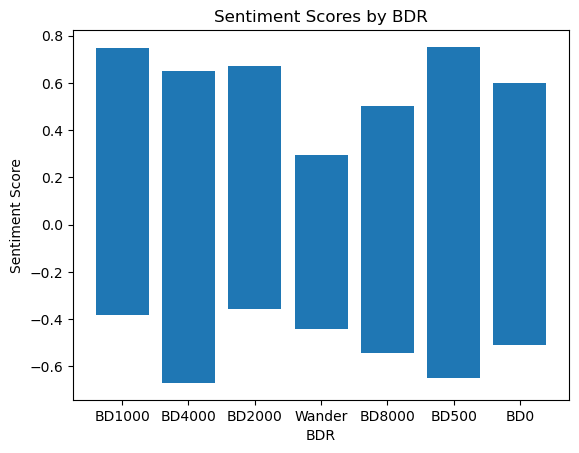

In [205]:
#Make a simple bar chart

# Create a bar chart
plt.bar(df_focus['BDR'], df_focus['sentiment_score'])

# Set the labels and title
plt.xlabel('BDR')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by BDR')

# Show the chart
plt.show()

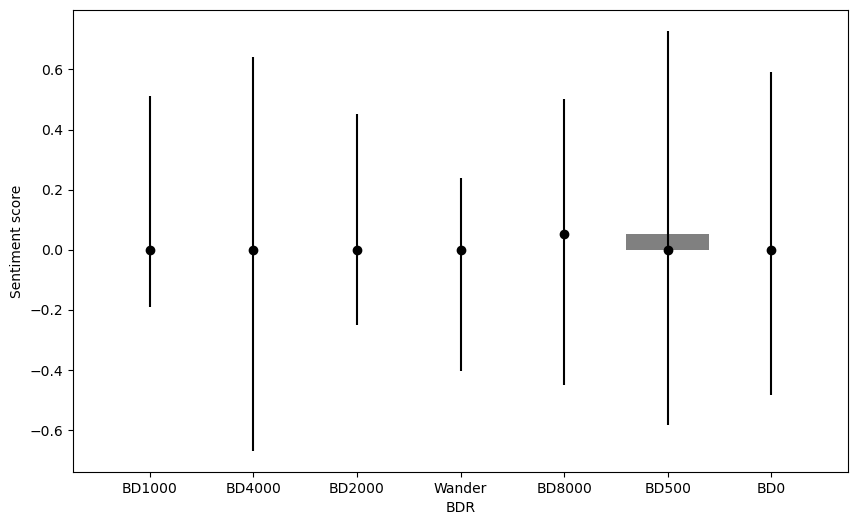

In [206]:
#Use medians. Add confidence intervals

# Compute the median sentiment score for each BDR value
medians = df_focus.groupby('BDR')['sentiment_score'].median()

# Compute the confidence intervals using the bootstrapping method
ci_low, ci_high = [], []
for bdr in df_focus['BDR'].unique():
    boot_sample = df_focus[df_focus['BDR'] == bdr]['sentiment_score'].sample(frac=1, replace=True)
    ci_low.append(boot_sample.quantile(0.025))
    ci_high.append(boot_sample.quantile(0.975))

# Create a bar plot with error bars representing the confidence intervals
plt.figure(figsize=(10, 6))
sns.barplot(x='BDR', y='sentiment_score', data=df_focus, estimator=np.median, ci=None, color='gray')
plt.errorbar(x=medians.index, y=medians.values, yerr=[medians.values - ci_low, ci_high - medians.values], fmt='o', color='black')
plt.ylabel('Sentiment score')
plt.xlabel('BDR')
plt.show()

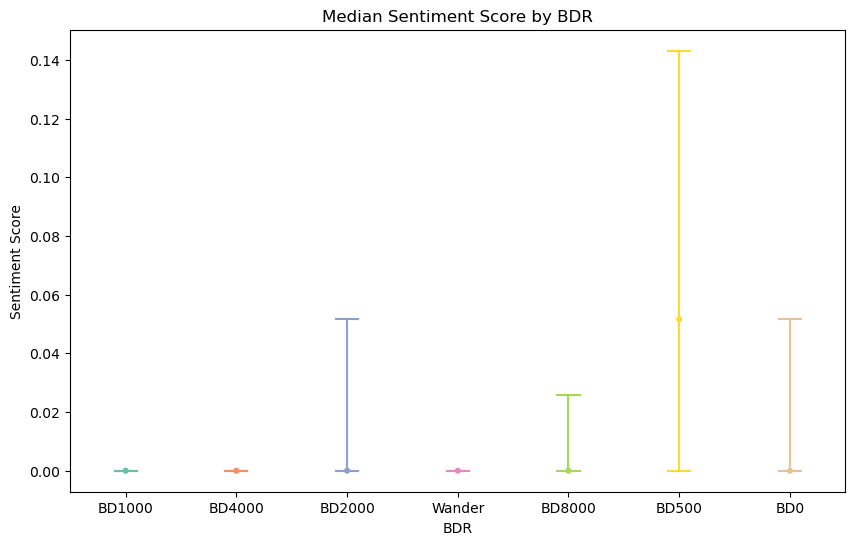

In [207]:
#alternative seaborn visualization

# Define the data to plot
x = 'BDR'
y = 'sentiment_score'
median_props = dict(linestyle='-', linewidth=2.5, color='firebrick')
ci_props = dict(linestyle='-', linewidth=1.5, color='firebrick')

# Create the plot using seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(x=x, y=y, data=df_focus, ax=ax, ci=95, join=False, 
              estimator=np.median, markers='o', errwidth=1.5,
              capsize=0.2, scale=0.5, palette='Set2',
              medianprops=median_props, errprops=ci_props)

# Set the axis labels and title
ax.set_xlabel('BDR')
ax.set_ylabel('Sentiment Score')
ax.set_title('Median Sentiment Score by BDR')

# Show the plot
plt.show()


Kruskal-Wallis test result: statistic = 15.028904728687033, p-value = 0.020033088744441617


<AxesSubplot:xlabel='BDR', ylabel='sentiment_score'>

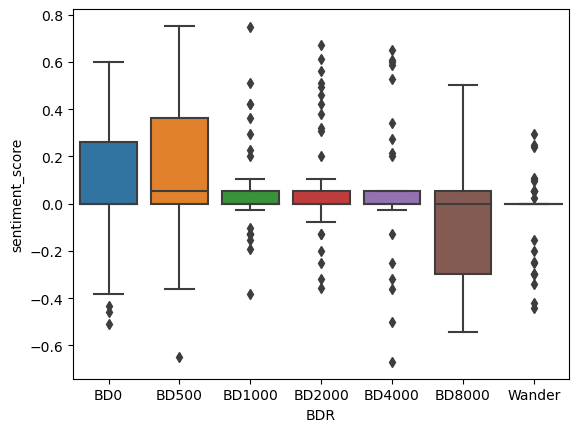

In [208]:
# Define order of BDR categories
bdr_order = ['BD0', 'BD500', 'BD1000', 'BD2000', 'BD4000', 'BD8000', 'Wander']

# Convert BDR column to categorical with defined order
df_focus['BDR'] = pd.Categorical(df_focus['BDR'], categories=bdr_order, ordered=True)

# Perform Kruskal-Wallis test
result = kruskal(*[group['sentiment_score'] for name, group in df_focus.groupby('BDR')])

# Print test result
print('Kruskal-Wallis test result: statistic = {}, p-value = {}'.format(result.statistic, result.pvalue))

# Visualize data using boxplot
sns.boxplot(x='BDR', y='sentiment_score', data=df_focus, order=bdr_order)

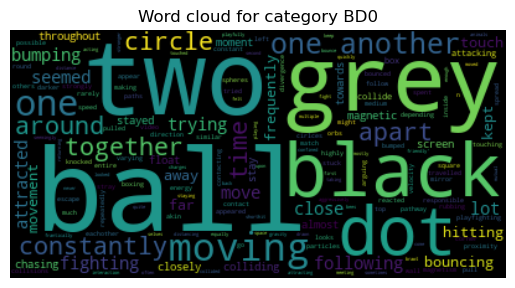

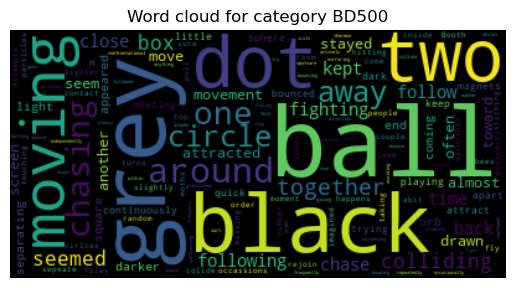

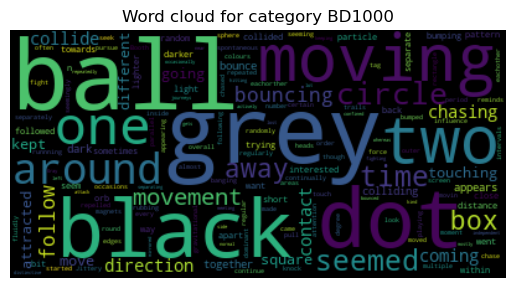

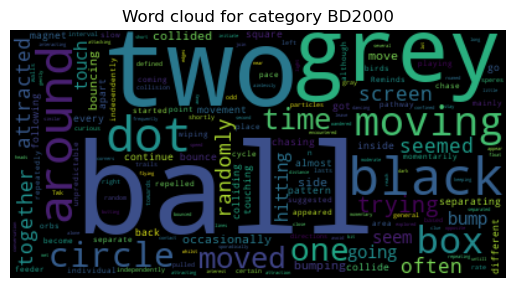

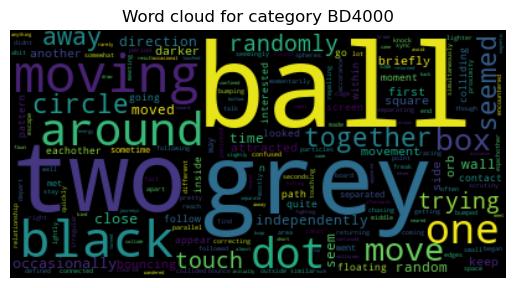

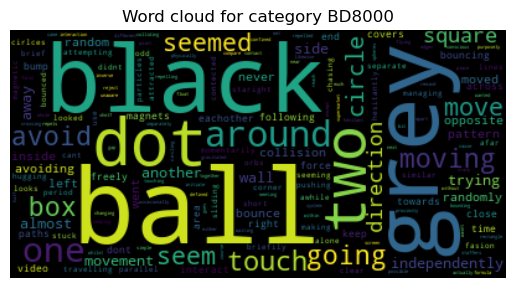

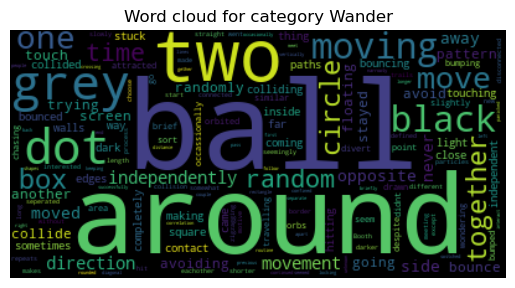

In [209]:
#Basic word cloud that only filters out unnecessary words like 'the' and 'it.' Sorted by BDR

# Define the stop words to be filtered out
stopwords = set(STOPWORDS)

# Group the response strings by the BDR category
grouped = df_focus.groupby('BDR')['response'].apply(lambda x: ' '.join(x))

# Generate a word cloud for each category
for category, text in grouped.items():
    # Remove the stop words from the text
    text = ' '.join([word for word in text.split() if word.lower() not in stopwords])

    # Generate the word cloud object
    wordcloud = WordCloud().generate(text)

    # Set up the plot
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word cloud for category {category}')

    # Show the plot
    plt.show()

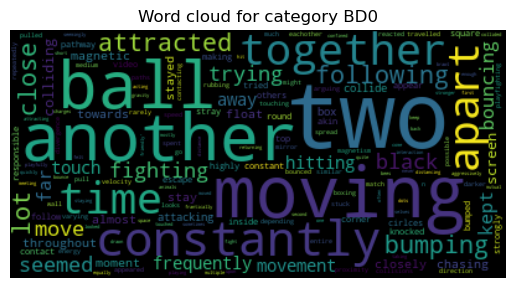

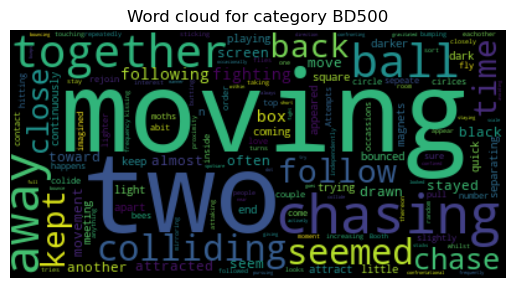

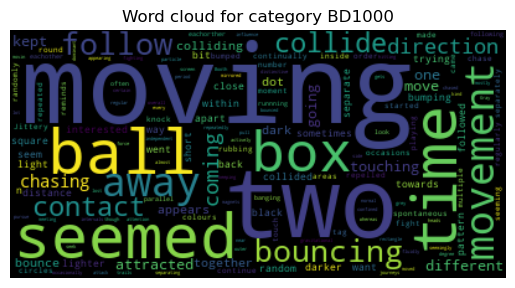

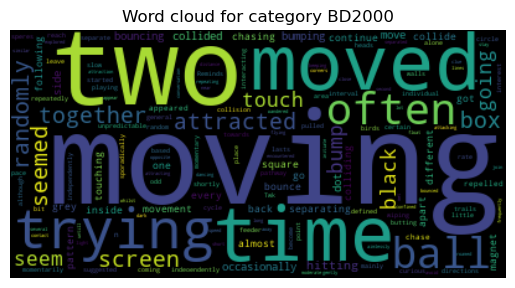

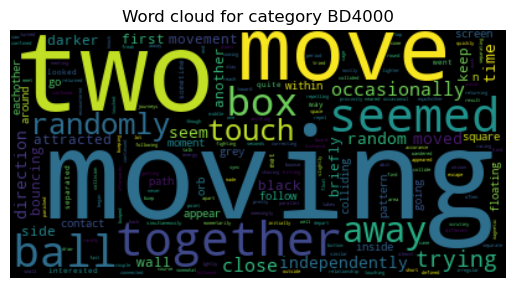

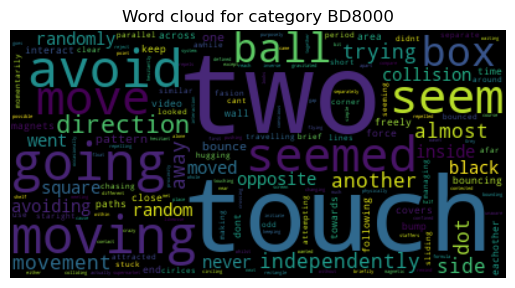

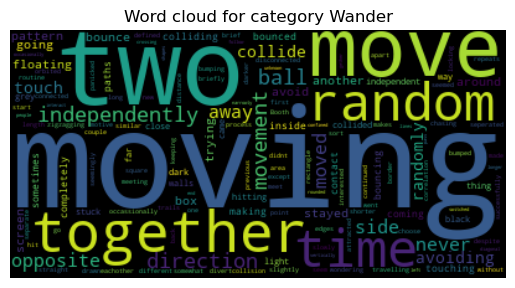

In [210]:
#Word clouds with additional'stop words' to be filtered out.

# Define the stop words to be filtered out

stop_words = set(['grey', 'gray', 'black', 'balls', 'ball', 'circle', 'circles', 'dot', 'dots', 'orb', 'orbs', 'particle', 'particles', 'sphere', 'spheres', 'box', 'wall', 'square', 'right', 'left', 'edges', 'edge', 'two', 'one', 'around']) | set(STOPWORDS)

# Group the response strings by the BDR category
grouped = df_focus.groupby('BDR')['response'].apply(lambda x: ' '.join(x))

# Generate a word cloud for each category
for category, text in grouped.items():
    # Remove the stop words from the text
    text = ' '.join([word for word in text.split() if word.lower() not in [sw.lower() for sw in stop_words]])

    # Generate the word cloud object
    wordcloud = WordCloud().generate(text)

    # Set up the plot
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word cloud for category {category}')

    # Show the plot
    plt.show()

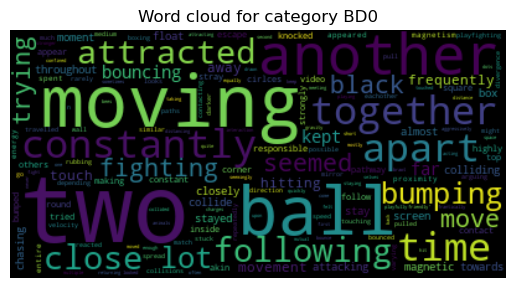

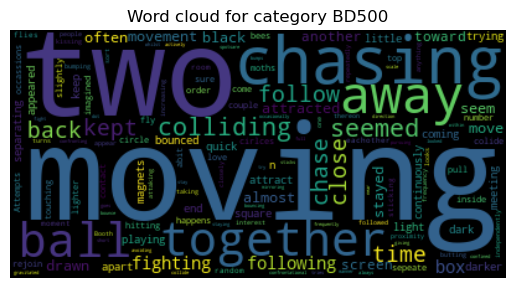

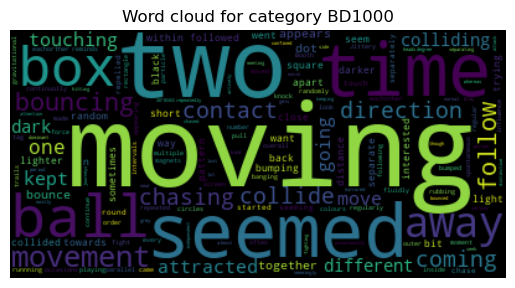

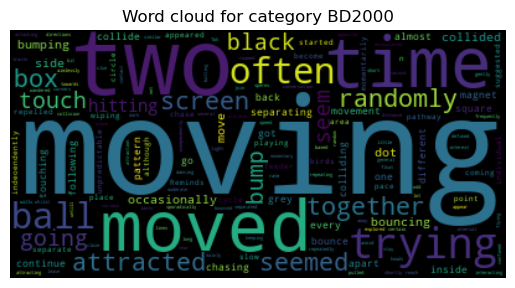

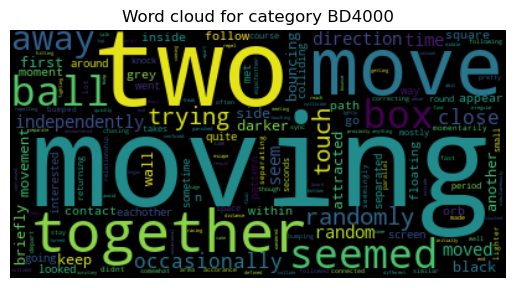

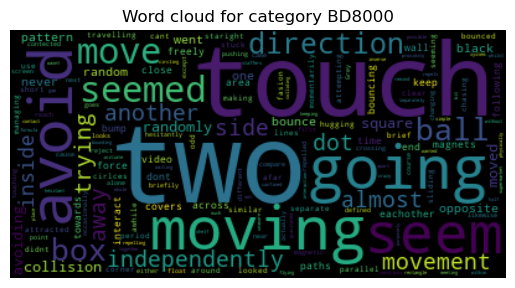

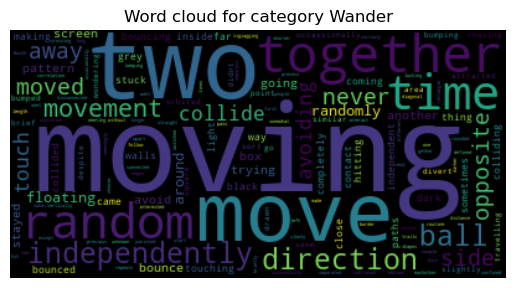

In [211]:
#Word clouds but with smarter filtering of stop words. Includes upper & lower case

# Define the stop words to be filtered out
stop_words = set(['grey', 'gray', 'black', 'balls', 'ball', 'circle', 'circles', 'dot', 'dots', 'orb', 'orbs', 'particle', 'particles', 'sphere', 'spheres', 'box', 'wall', 'square', 'right', 'left', 'edges', 'edge', 'two', 'around', 'One', 'Two', 'Ball', 'Box', 'Black']) | set(STOPWORDS)

# Add uppercase versions of the stop words to the set
stop_words.update([word.upper() for word in stop_words])

# Add lowercase versions of the stop words to the set
stop_words.update([word.lower() for word in stop_words])

# Add mixed-case versions of the stop words to the set
stop_words.update([word.title() for word in stop_words])

# Group the response strings by the BDR category
grouped = df_focus.groupby('BDR')['response'].apply(lambda x: ' '.join(x))

# Generate a word cloud for each category
for category, text in grouped.items():
    # Remove the stop words from the text
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Generate the word cloud object
    wordcloud = WordCloud().generate(text)

    # Set up the plot
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word cloud for category {category}')

    # Show the plot
    plt.show()



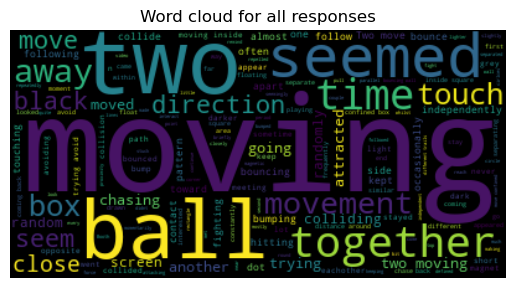

In [212]:
#Word cloud for all responses (not sorted by BDR)

# Join all the responses into a single string
all_responses = ' '.join(df_focus['response'])

# Remove the stop words from the text
all_responses = ' '.join([word for word in all_responses.split() if word.lower() not in stop_words])

# Generate the word cloud object
wordcloud = WordCloud().generate(all_responses)

# Set up the plot
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word cloud for all responses')

# Show the plot
plt.show()

In [213]:

# Define the stop words to be filtered out
stop_words = set(['grey', 'gray', 'black', 'balls', 'ball', 'circle', 'circles', 'dot', 'dots', 'orb', 'orbs', 'particle', 'particles', 'sphere', 'spheres', 'box', 'wall', 'square', 'right', 'left', 'edges', 'edge', 'two', 'one', 'around']) | set(STOPWORDS)

# Combine all responses into a single string
all_responses = ' '.join(df_focus['response'])

# Remove stop words and unwanted words from the overall response string
all_responses = ' '.join([word for word in all_responses.split() if word.lower() not in stop_words and word.lower() not in stop_words])

# Create a counter object to count word frequencies
word_counts = Counter(all_responses.split())

# Create a table for overall frequency
overall_freq_table = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False).head(10)

# Group the response strings by the BDR category
grouped = df_focus.groupby('BDR')['response'].apply(lambda x: ' '.join(x))

# Generate a word frequency table for each category
freq_tables = {}
for category, text in grouped.items():

    # Remove stop words, unwanted words, and words with quotation marks from the overall response string
    all_responses = ' '.join([word for word in all_responses.split() if word.lower() not in stop_words and '"' not in word])

    # Create a counter object to count word frequencies
    word_counts = Counter(all_responses.split())

    # Create a frequency table for the category
    freq_table = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False).head(10)

    freq_tables[category] = freq_table

    # Display the frequency table for the category
    print(f'Word frequency table for category {category}:')
    display(freq_table)

# Display the overall frequency table
print('Overall frequency table:')
display(overall_freq_table)

Word frequency table for category BD0:


frequency
moving            80
move              36
seemed            35
away              26
trying            25
together          23
going             19
bouncing          19
attracted         19
close             17

Word frequency table for category BD500:


frequency
moving            80
move              36
seemed            35
away              26
trying            25
together          23
going             19
bouncing          19
attracted         19
close             17

Word frequency table for category BD1000:


frequency
moving            80
move              36
seemed            35
away              26
trying            25
together          23
going             19
bouncing          19
attracted         19
close             17

Word frequency table for category BD2000:


frequency
moving            80
move              36
seemed            35
away              26
trying            25
together          23
going             19
bouncing          19
attracted         19
close             17

Word frequency table for category BD4000:


frequency
moving            80
move              36
seemed            35
away              26
trying            25
together          23
going             19
bouncing          19
attracted         19
close             17

Word frequency table for category BD8000:


frequency
moving            80
move              36
seemed            35
away              26
trying            25
together          23
going             19
bouncing          19
attracted         19
close             17

Word frequency table for category Wander:


frequency
moving            80
move              36
seemed            35
away              26
trying            25
together          23
going             19
bouncing          19
attracted         19
close             17

Overall frequency table:


frequency
moving          80
"The            74
"}              66
"two            52
other"}         36
move            36
seemed          35
"Two            33
"the            29
away            26

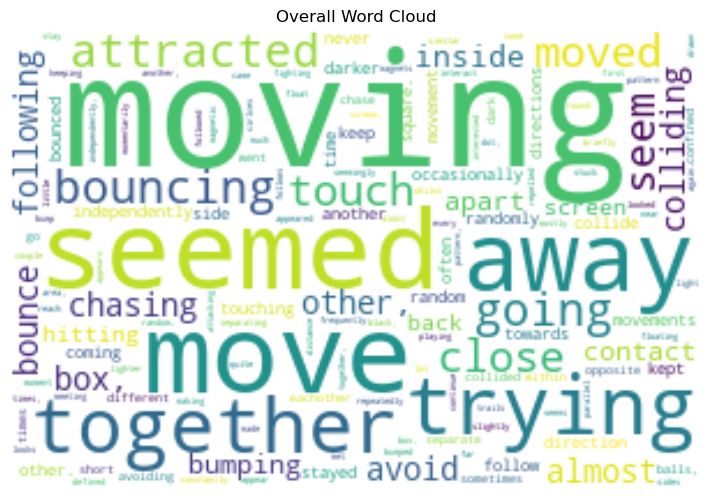

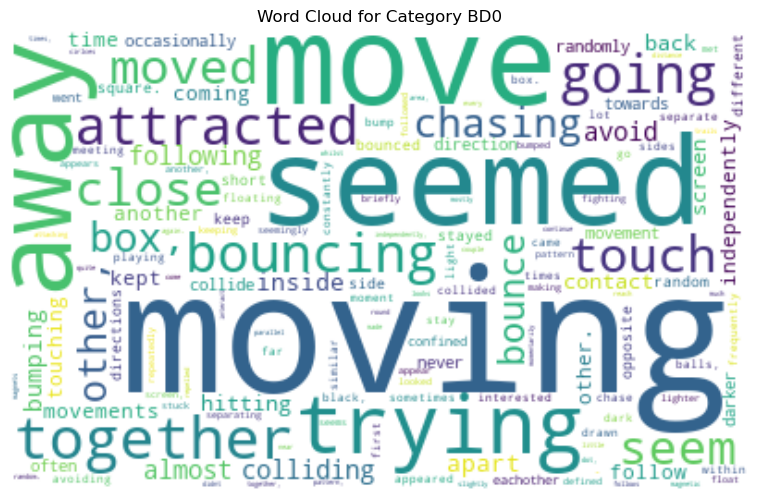

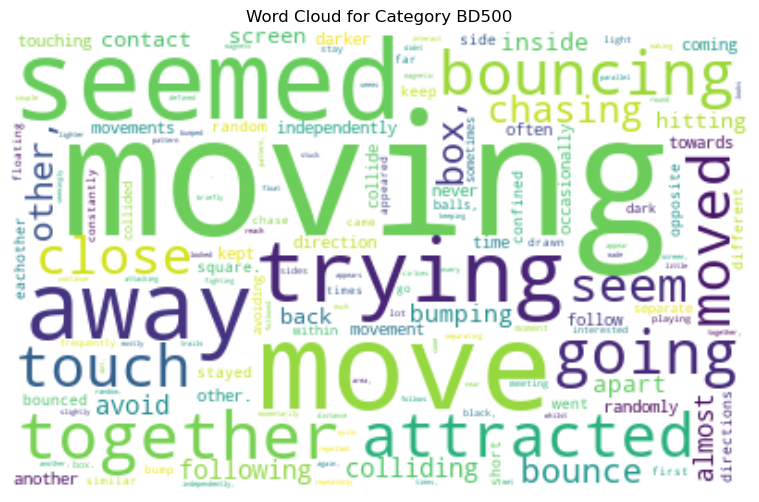

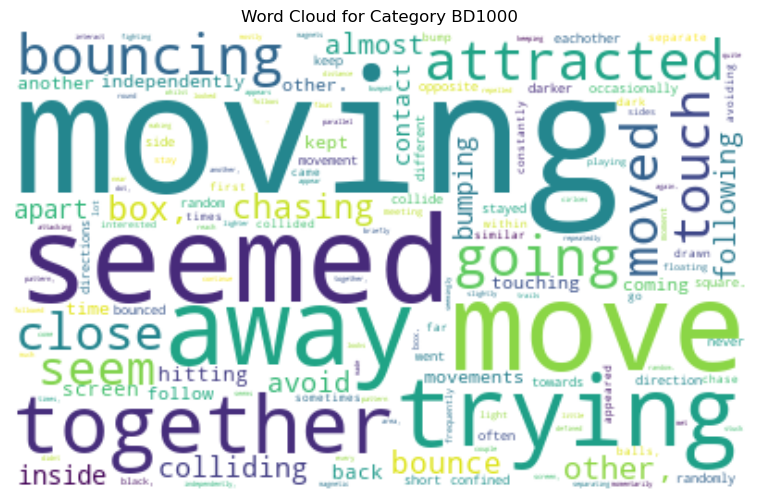

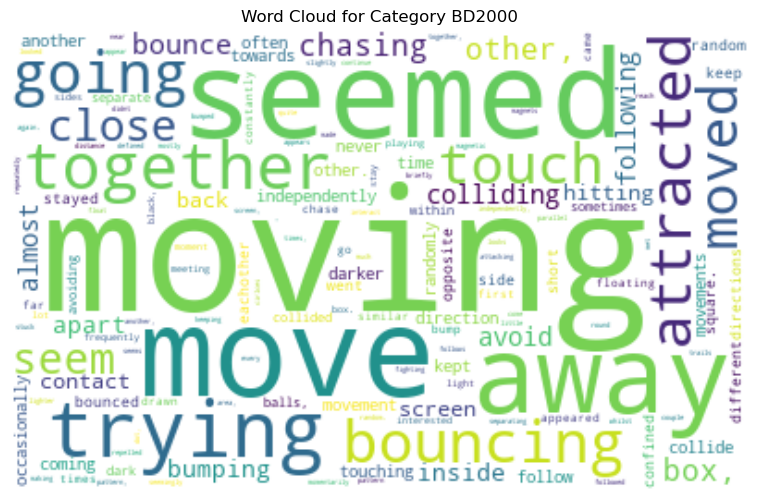

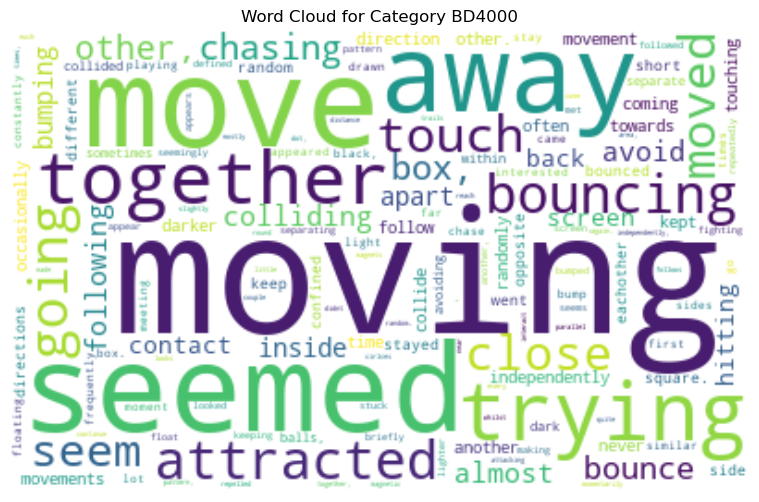

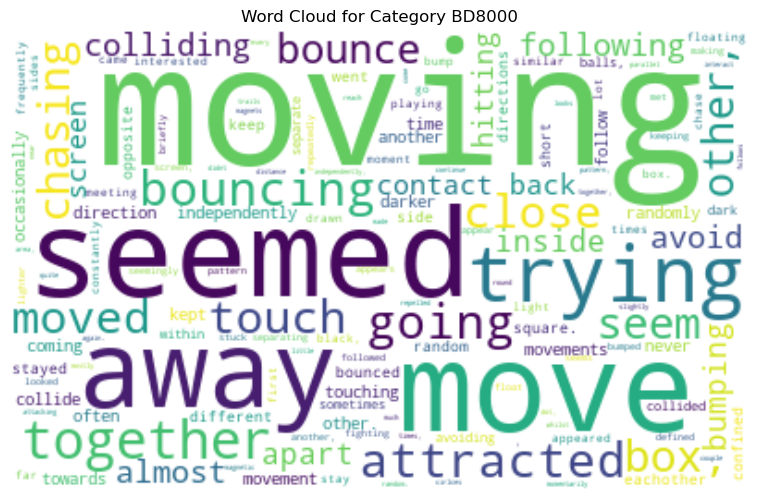

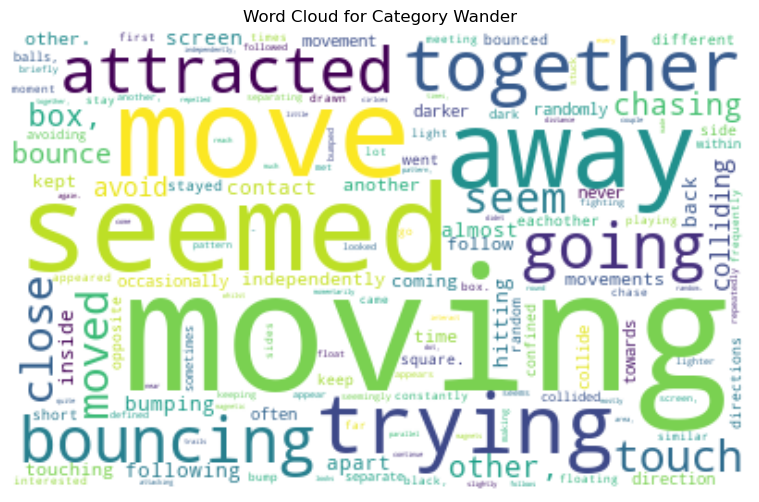

In [214]:
# Define the stop words to be filtered out
stop_words = set(['grey', 'gray', 'black', 'balls', 'ball', 'circle', 'circles', 'dot', 'dots', 'orb', 'orbs', 'particle', 'particles', 'sphere', 'spheres', 'box', 'wall', 'square', 'right', 'left', 'edges', 'edge', 'two', 'one', 'around']) | set(STOPWORDS)

# Combine all responses into a single string
all_responses = ' '.join(df_focus['response'])

# Remove stop words, unwanted words, and words with quotation marks from the overall response string
all_responses = ' '.join([word for word in all_responses.split() if word.lower() not in stop_words and '"' not in word])
    
# Create a counter object to count word frequencies
word_counts = Counter(all_responses.split())

# Generate a word cloud for overall frequency
overall_wordcloud = WordCloud(width=300, height=200, background_color='white').generate_from_frequencies(word_counts)

# Display the overall word cloud
plt.figure(figsize=(12, 6))
plt.imshow(overall_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud')
plt.show()

# Group the response strings by the BDR category
grouped = df_focus.groupby('BDR')['response'].apply(lambda x: ' '.join(x))

# Generate a word cloud for each category
for category, text in grouped.items():
    # Remove stop words, unwanted words, and words with quotation marks from the overall response string
    all_responses = ' '.join([word for word in all_responses.split() if word.lower() not in stop_words and '"' not in word])

    # Create a counter object to count word frequencies
    word_counts = Counter(all_responses.split())

    # Generate a word cloud for the category
    category_wordcloud = WordCloud(width=400, height=250, background_color='white').generate_from_frequencies(word_counts)

    # Display the word cloud for the category
    plt.figure(figsize=(12, 6))
    plt.imshow(category_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Category {category}')
    plt.show()

In [215]:
#This iteration uses stemming to consolidate words that appear in different tenses into a single word. Ex: moving -. moved

# Create a Snowball Stemmer object for English
stemmer = SnowballStemmer('english')

# Apply stemming to each word in the response string
stemmed_responses = [stemmer.stem(word) for word in all_responses.split()]

# Remove stop words and unwanted words from the overall response string
stemmed_responses = [word for word in stemmed_responses if word.lower() not in stop_words and word.lower() not in stop_words]

# Create a counter object to count word frequencies
word_counts = Counter(stemmed_responses)

# Create a word cloud object for all responses
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud 
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()z


SyntaxError: invalid syntax (984093563.py, line 22)

In [ ]:
# Initialize the Snowball Stemmer
stemmer = SnowballStemmer('english')

# Combine all responses into a single string
all_responses = ' '.join(df_focus['response'])

# Remove stop words, unwanted words, and words with quotation marks from the overall response string
all_responses = ' '.join([word for word in all_responses.split() if word.lower() not in stop_words and '"' not in word])

# Stem the words in the overall response string
all_responses_stemmed = ' '.join([stemmer.stem(word) for word in all_responses.split()])

# Create a counter object to count word frequencies
word_counts = Counter(all_responses_stemmed.split())

# Create a table for overall frequency
overall_freq_table = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False).head(10)

# Group the response strings by the BDR category
grouped = df_focus.groupby('BDR')['response'].apply(lambda x: ' '.join(x))

# Generate a word frequency table for each category
freq_tables = {}
for category, text in grouped.items():

    # Remove stop words and unwanted words from the text
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words and '"' not in word])

    # Stem the words in the text
    text_stemmed = ' '.join([stemmer.stem(word) for word in text.split()])

    # Create a counter object to count word frequencies
    word_counts = Counter(text_stemmed.split())

    # Create a frequency table for the category
    freq_table = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False).head(10)

    freq_tables[category] = freq_table

    # Display the frequency table for the category
    print(f'Word frequency table for category {category}:')
    display(freq_table)

# Display the overall frequency table
print('Overall frequency table:')
display(overall_freq_table)

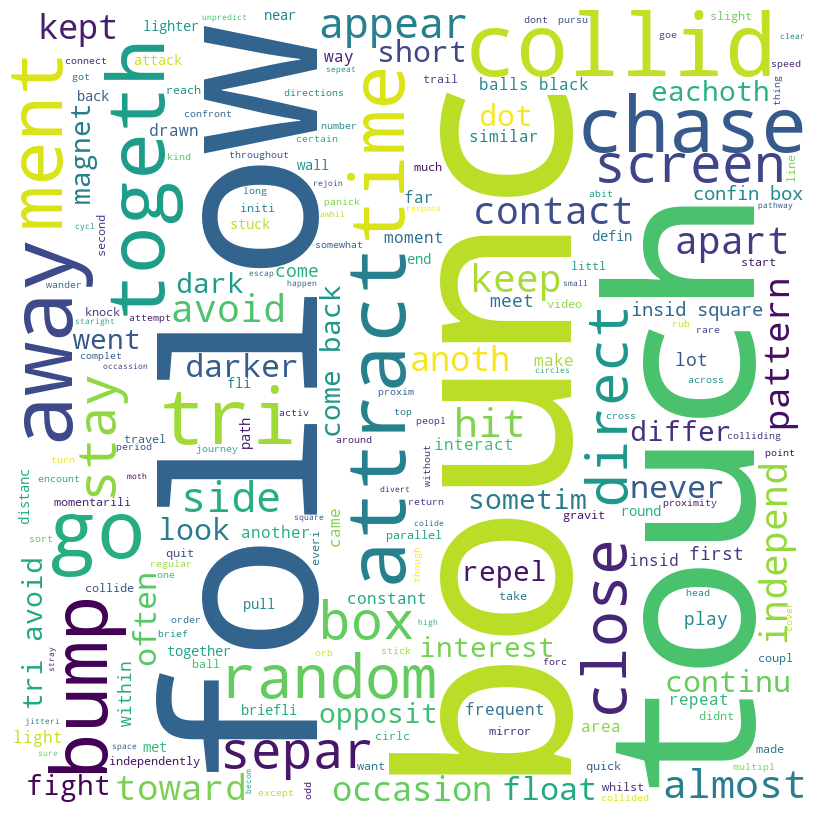

In [218]:
#Stemmed word cloud overall excluding 'move' and 'seem'

# Combine all responses into a single string
all_responses = ' '.join(df_focus['response'])

# Remove stop words, unwanted words, and words with quotation marks from the overall response string
all_responses = ' '.join([word for word in all_responses.split() if word.lower() not in stop_words and '"' not in word])

# Initialize the Snowball Stemmer
stemmer = SnowballStemmer('english')

# Stem the words in the overall response string
all_responses_stemmed = ' '.join([stemmer.stem(word) for word in all_responses.split()])

# Remove specific words from the stemmed string
all_responses_stemmed = all_responses_stemmed.replace('move', '').replace('seem', '')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_responses_stemmed)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

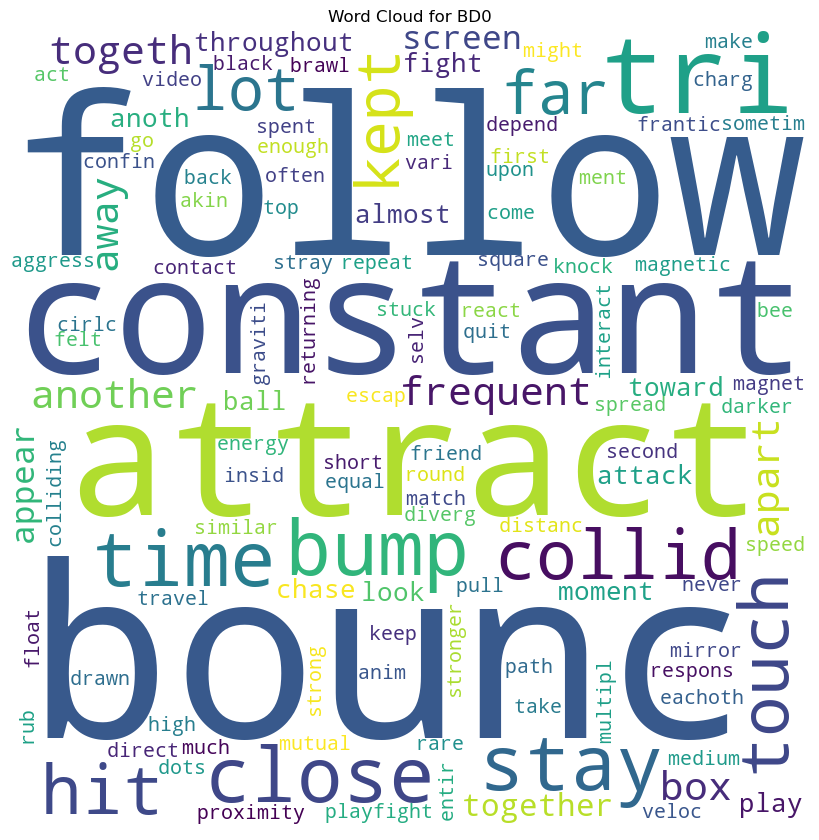

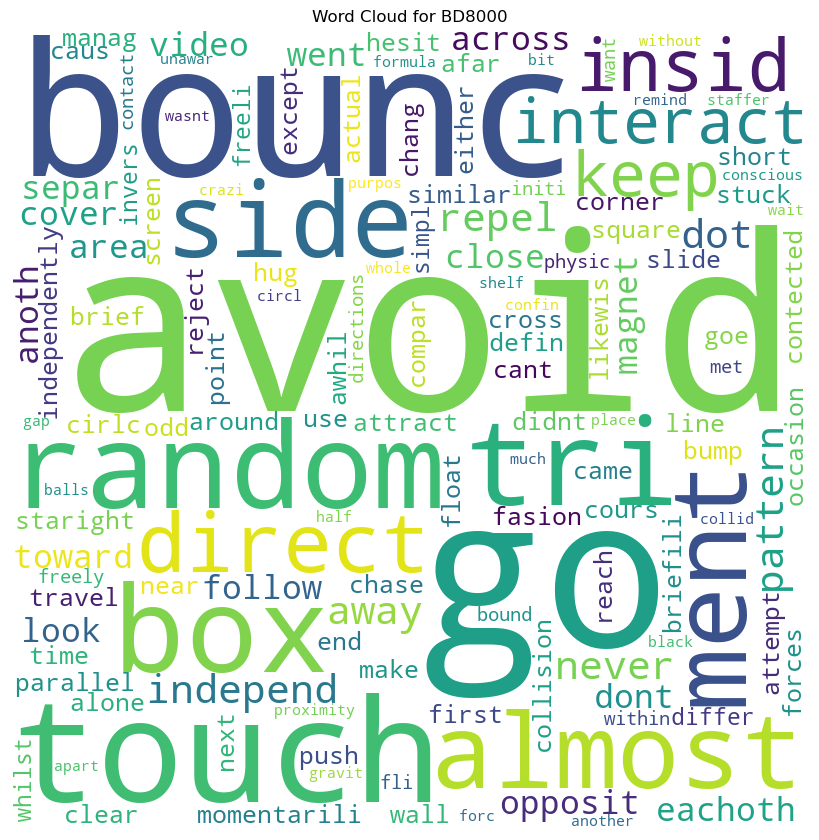

In [219]:
#Stemmed word cloud for BD0 and BD8000 excluding 'move' and 'seem'

# Generate word clouds for specific categories
for category, text in grouped.items():
    if category == 'BD0':
        # Clean the text and stem the words
        text = ' '.join([word for word in text.split() if word.lower() not in stop_words and '"' not in word])
        text_stemmed = ' '.join([stemmer.stem(word) for word in text.split()])
        text_stemmed = text_stemmed.replace('move', '').replace('seem', '')

        # Create a WordCloud object
        wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text_stemmed)

        # Display the word cloud
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.title(f'Word Cloud for {category}')
        plt.show()

    elif category == 'BD8000':
        # Clean the text and stem the words
        text = ' '.join([word for word in text.split() if word.lower() not in stop_words and '"' not in word])
        text_stemmed = ' '.join([stemmer.stem(word) for word in text.split()])
        text_stemmed = text_stemmed.replace('move', '').replace('seem', '')

        # Create a WordCloud object
        wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text_stemmed)

        # Display the word cloud
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.title(f'Word Cloud for {category}')
        plt.show()